<a href="https://colab.research.google.com/github/provincit/colab_public/blob/main/make_moons_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt, pandas as pd
from sklearn import datasets

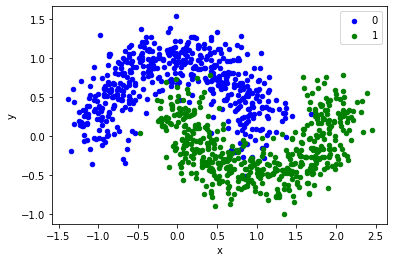

In [2]:
br = '\n'
X, y = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.2,
random_state=0)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'blue', 1:'green'}
fig, ax = plt.subplots()
data = df.groupby('label')
for key, label in data:

  label.plot(ax=ax, kind='scatter', x='x', y='y', label=key,
  color=colors[key])
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
def get_scores(model, Xtrain, Xtest, ytrain, ytest):
 y_ptrain = model.predict(Xtrain)
 y_ptest = model.predict(Xtest)
 acc_train = accuracy_score(ytrain, y_ptrain)
 acc_test = accuracy_score(ytest, y_ptest)
 name = model.__class__.__name__
 return (name, acc_train, acc_test)

br = '\n'
X, y = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.2,
random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier().fit(X_train, y_train)
accuracy = get_scores(knn, X_train, X_test, y_train, y_test)
print ('<<' + str(accuracy[0]) + '>>')
print ('train:', accuracy[1], 'test:', accuracy[2], br)
svm = svm.SVC(gamma='scale', random_state=0)
svm.fit(X_train, y_train)
accuracy = get_scores(svm, X_train, X_test, y_train, y_test)
print ('<<' + str(accuracy[0]) + '>>')
print ('train:', accuracy[1], 'test:', accuracy[2])

<<KNeighborsClassifier>>
train: 0.9666666666666667 test: 0.964 

<<SVC>>
train: 0.968 test: 0.972


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_moons

In [7]:
def get_scores(model, Xtrain, ytrain, Xtest, ytest, Xvalid, yvalid):
 y_ptrain = model.predict(Xtrain)
 y_ptest = model.predict(Xtest)
 y_pvalid = model.predict(Xvalid)
 acc_train = accuracy_score(ytrain, y_ptrain)
 acc_test = accuracy_score(ytest, y_ptest)
 acc_valid = accuracy_score(yvalid, y_pvalid)
 name = model.__class__.__name__
 return (name, acc_train, acc_test, acc_valid)


br = '\n'
X_train, y_train = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=0)
X_test, y_test = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=0)
X_valid, y_valid = make_moons(n_samples=10000, shuffle=True, noise=0.2, random_state=0)
knn = KNeighborsClassifier().fit(X_train, y_train)
accuracy = get_scores(knn, X_train, y_train, X_test, y_test, X_valid, y_valid)


print('train test valid split (technique 1):')
print('<<' + str(accuracy[0]) + '>>')
print('train:', accuracy[1], 'test:', accuracy[2], 'valid:', accuracy[3])
print('sample split:', X_train.shape, X_test.shape, X_valid.shape)
print()

X, y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
test_size=0.25,
random_state=0)


knn = KNeighborsClassifier().fit(X_train, y_train)
accuracy = get_scores(knn, X_train, y_train, X_test, y_test, X_valid,
y_valid)
print('train test valid split (technique 2):')
print('<<' + str(accuracy[0]) + '>>')
print('train:', accuracy[1], 'test:', accuracy[2], 'valid:', accuracy[3])
print('sample split:', X_train.shape, X_test.shape, X_val.shape)

train test valid split (technique 1):
<<KNeighborsClassifier>>
train: 0.969 test: 0.969 valid: 0.9688
sample split: (1000, 2) (1000, 2) (10000, 2)

train test valid split (technique 2):
<<KNeighborsClassifier>>
train: 0.9616666666666667 test: 0.975 valid: 0.9694
sample split: (600, 2) (200, 2) (200, 2)
